Wrap and run command

In [1]:
%%bash
./src/sms.sh lscpu

Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      39 bits physical, 48 bits virtual
CPU(s):                             16
On-line CPU(s) list:                0-15
Thread(s) per core:                 2
Core(s) per socket:                 8
Socket(s):                          1
Vendor ID:                          GenuineIntel
CPU family:                         6
Model:                              154
Model name:                         12th Gen Intel(R) Core(TM) i7-1260P
Stepping:                           3
CPU MHz:                            2496.011
BogoMIPS:                           4992.02
Virtualization:                     VT-x
Hypervisor vendor:                  Microsoft
Virtualization type:                full
L1d cache:                          384 KiB
L1i cache:                          256 KiB
L2 cache:                           10 MiB
L3 cach

Mine DFG

In [2]:
from strace_miner.views.v3 import IOMinerV3
from strace_miner.views.v3 import IOLineReaderV3

io_calls = ['read','write']
line_reader = IOLineReaderV3(['/workspaces/',],collapse=False)
sta = IOMinerV3(["logs/sms.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()
sta.activities_summary['sms']

CSV log path: logs/sms.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


,call,duration,percent
0,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000083,0.035110
1,"[read, [<4KB], /proc/cpuinfo]",0.001957,0.827838
2,"[read, [<4KB], /proc/sys]",0.000033,0.013959
3,"[read, [<4KB], /sys/devices]",0.000647,0.273690
4,"[read, [<4KB], /usr/lib]",0.000068,0.028765
5,"[read, [<4MB], /etc/locale.alias]",0.000139,0.058799
6,"[read, [<4MB], /sys/devices]",0.012476,5.277518
7,"[write, [<4KB], pipe:[207845]]",0.000053,0.022420


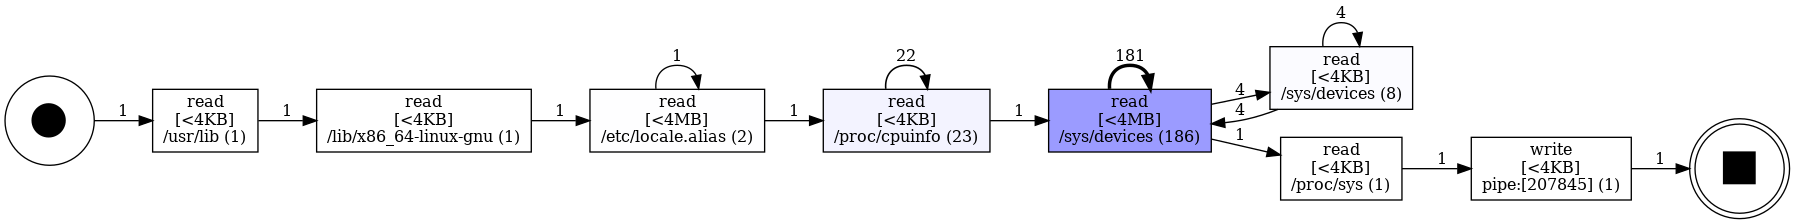

In [3]:
sta.view_dfg()

MPI usage

In [4]:
!mpiexec -n 2 bash src/smp.sh ls

logs/ls_a65243794be3_13907.st
logs/ls_a65243794be3_13908.st
-e				  02-test-view1.ipynb  05-test-wrapper.ipynb
00-prepare-eg.ipynb		  03-dev-View2.ipynb   data
01A-devCore-LineReader.ipynb	  03-test-view2.ipynb  logs
01B-devCore-Preprocessor.ipynb	  04-dev-view3.ipynb   old
01C-devCore-StraceAnalyzer.ipynb  04-test-view3.ipynb  src
-e				  02-test-view1.ipynb  05-test-wrapper.ipynb
02-dev-View1.ipynb		  05-sm-wrapper.ipynb
00-prepare-eg.ipynb		  03-dev-View2.ipynb   data
01A-devCore-LineReader.ipynb	  03-test-view2.ipynb  logs
01B-devCore-Preprocessor.ipynb	  04-dev-view3.ipynb   old
01C-devCore-StraceAnalyzer.ipynb  04-test-view3.ipynb  src
02-dev-View1.ipynb		  05-sm-wrapper.ipynb


In [5]:
!rm logs/ls*